In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image 
import tensorflow as tf
print("tensorflow version :",tf.__version__)

tensorflow version : 2.15.0


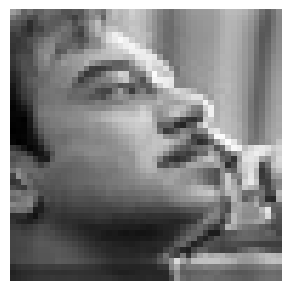

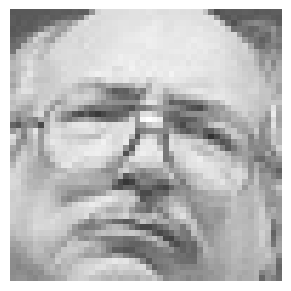

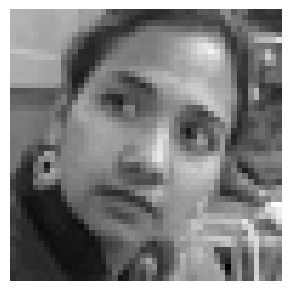

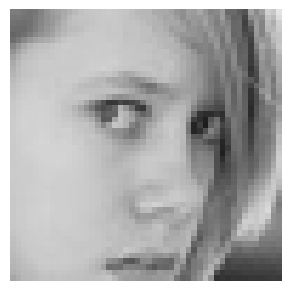

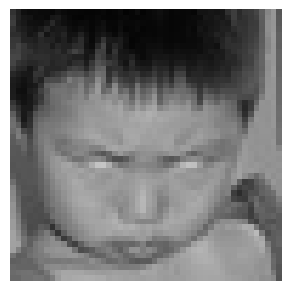

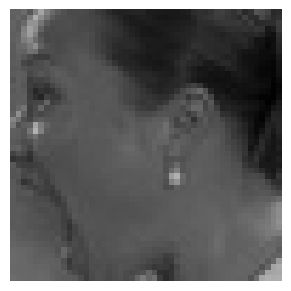

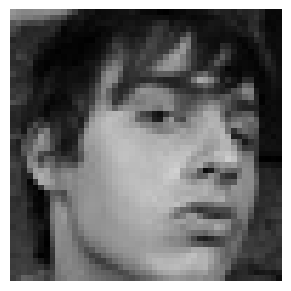

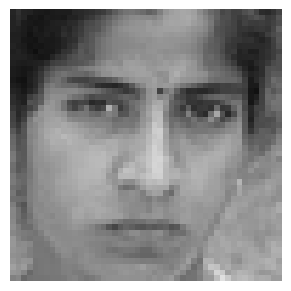

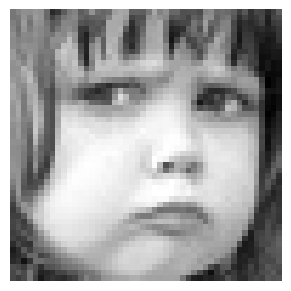

In [3]:
images= glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

# Prepare Data for Training



In [4]:
img_size=48
batch_size=64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(
    "train/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Validation data generator
datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory(
    "test/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

Found 64 images belonging to 1 classes.
Found 78 images belonging to 1 classes.


In [4]:
#Defining the model

def convolation(input_tensor,filters,kernel_size):
    x=convo2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation()(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation()(x)
    x=Dropout(0.25)(x)
    
    return x

In [5]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    conv_1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    conv_2 = Conv2D(64, (5, 5), activation='relu')(conv_1)
    conv_3 = Conv2D(128, (3, 3), activation='relu')(conv_2)
    flatten = Flatten()(conv_3)
    dense_1 = Dense(256, activation='relu')(flatten)
    output = Dense(7, activation='softmax')(dense_1)
    
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = model_fer((48, 48, 1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        51264     
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 256)               52429056  
                                                                 
 dense_1 (Dense)             (None, 7)                 1799

In [7]:
#Initialization of the model

In [6]:
epochs=15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weights_only= True,mode='max',verbode=1)
callbacks=[checkpoint]

In [9]:
#Training the model

In [7]:


# Now use it in the fit method
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[checkpoint]
)

Epoch 1/15


1/1 [==============================] - 6s 6s/step - loss: 165.6497 - accuracy: 0.0156 - val_loss: 11433.0967 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 11039.9580 - accuracy: 0.0000e+00 - val_loss: 15775.8184 - val_accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 14779.1133 - accuracy: 0.0000e+00 - val_loss: 19946.7578 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 2s 2s/step - loss: 19277.8008 - accuracy: 0.0000e+00 - val_loss: 21820.9883 - val_accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 2s 2s/step - loss: 20881.1934 - accuracy: 0.0000e+00 - val_loss: 90298.4375 - val_accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 2s 2s/step - loss: 85950.9297 - accuracy: 0.0000e+00 - val_loss: 144713.5156 - val_accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 2s 2s/step - loss: 140813.3125 - ac

In [12]:
#Model evaluation

In [8]:
model.evaluate(validation_generator)

2/2 [==============================] - 0s 71ms/step - loss: 2544302.5000 - accuracy: 0.0000e+00


[2544302.5, 0.0]

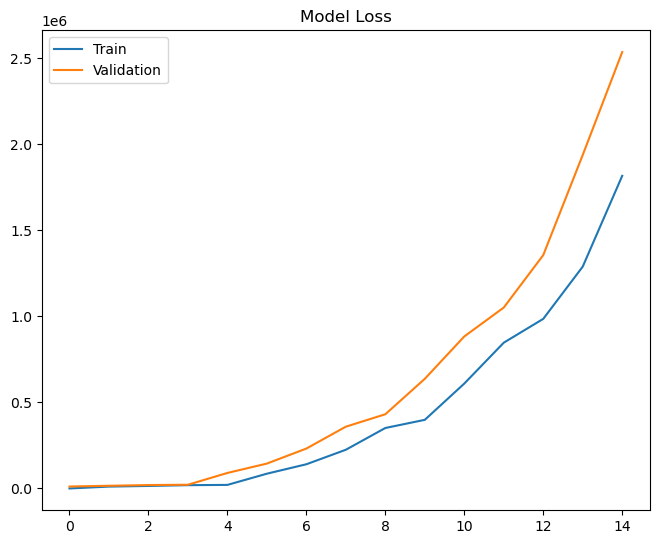

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

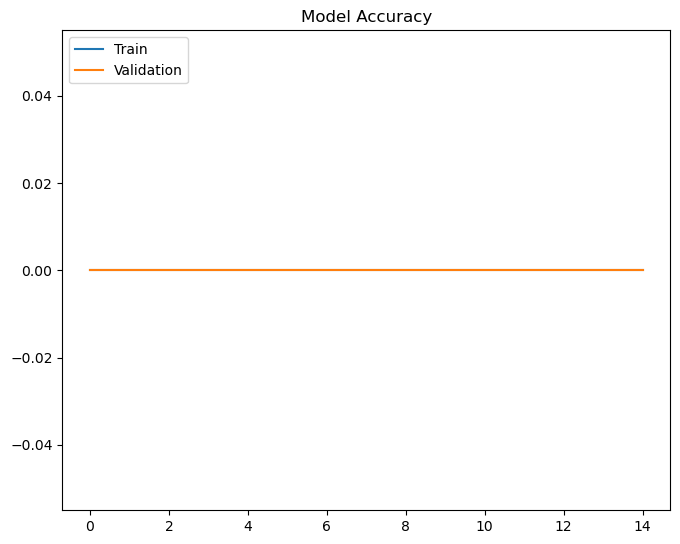

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [18]:
#Saving Model

In [10]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)